Загрузим стандартные библиотеки

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron      #Single-layer perceptron
from sklearn.neural_network import MLPClassifier #Multilayer perceptron 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

Загрузим интересующий нас набор данных

In [2]:
mnist = datasets.load_digits()

Посмотрим на матричное представление изображений

In [3]:
mnist['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Ничего нового — просто матрица интенсивностей. Минимальное значение — значение 0 — соответствует черному цвету, максимальное — 15 — соответствует белому

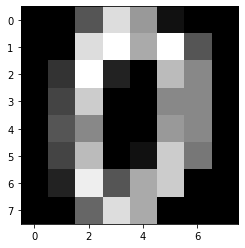

In [4]:
%matplotlib inline
fig = plt.figure()
plt.imshow(mnist['images'][0], cmap = 'gray')

Обучать будем на строках. Благо, они есть сразу

In [5]:
mnist['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Возьмем отдельно фичи, отдельно — таргеты

In [6]:
X = mnist['data']
y = mnist['target']

Разделим данные для теста, например, в соотношении 70/30

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Перед обучением отнормируем наши данные

In [8]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Итак, обучим однослойную НС. Кстати, [description](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). Зададим количество итераций (условно — эпох), скорость обучения у SGD, ну и рандом стейт для понятно чего

In [9]:
ppn = Perceptron(max_iter = 40, eta0 = 0.1, random_state = 0)

Фит

In [10]:
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40)

Предикт

In [11]:
 y_pred = ppn.predict(X_test_std)

In [12]:
print('Single-layer perceptron accuracy: %.4f' % accuracy_score(y_test, y_pred))

Single-layer perceptron accuracy: 0.9296


Можно увидеть и веса

In [13]:
ppn.coef_

array([[ 0.00000000e+00,  4.78254995e-02,  1.32262585e-01,
         1.16023847e-01,  2.84748241e-01, -8.06183076e-01,
        -2.99571558e-01,  3.02399524e-01, -1.75413598e+00,
        -6.27763835e-01, -1.12928339e-01,  6.79905247e-02,
         4.53885423e-01,  7.19587629e-01, -1.11407656e-01,
        -6.09720206e-01, -2.24950548e+00,  3.51157920e-01,
         2.50729181e-01, -2.38506649e-01, -7.13902512e-01,
         9.40871114e-01,  7.86650117e-02, -1.36056811e+00,
        -3.36342258e+00,  7.35140339e-02,  1.57876350e-01,
        -4.72007450e-01, -1.18381197e+00, -1.13939169e-01,
         7.45213426e-02, -2.24950548e+00,  0.00000000e+00,
        -6.89824011e-02, -1.64550732e-04, -4.78542956e-01,
        -7.84973918e-01,  2.07370170e-01,  1.01336021e-02,
         0.00000000e+00, -1.39768210e+00, -1.25292354e-01,
         8.23541615e-01, -9.81130266e-01, -6.19918052e-01,
         1.20127046e-01,  6.36865786e-02,  3.03770653e-01,
        -9.53818331e-01, -4.55386580e-01,  4.47483449e-0

In [14]:
mppn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(256, 512, 128), random_state=1)

In [15]:
mppn.fit(X_train_std, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(256, 512, 128), random_state=1,
              solver='lbfgs')

In [16]:
y_pred = mppn.predict(X_test_std)

In [17]:
print('Multi-layer perceptron accuracy: %.4f' % accuracy_score(y_test, y_pred))

Multi-layer perceptron accuracy: 0.9611
